### 4) Is there a relation between number of goals concede and points obtained?

In this case, we want to investigate if having a good defense is a synonim of winning games. For it, we will implement the linear regression method combined with an hypothesis test on B1. We will apply the model over la liga matches database. 

Slope: -0.6284851845273132
Intercept: 2.211357527683003


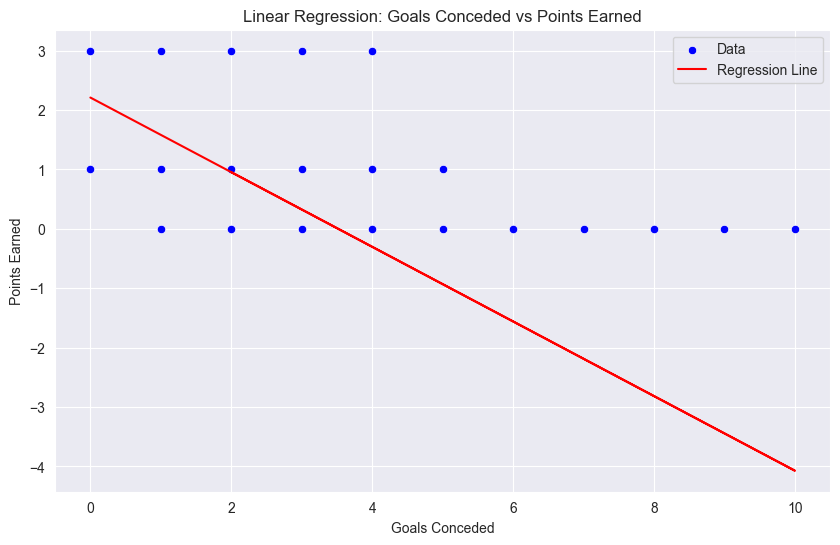

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize lists to store the pairs (goals conceded, points earned)
data_pairs = []

# Iterate over each row in the dataset
for index, row in laliga_df.iterrows():
    FTHG = row['FTHG']  # Full Time Home Goals
    FTAG = row['FTAG']  # Full Time Away Goals
    
    # Data for the home team
    if FTHG > FTAG:
        home_points = 3
        away_points = 0
    elif FTHG < FTAG:
        home_points = 0
        away_points = 3
    else:
        home_points = 1
        away_points = 1
    
    # Add the pairs (goals conceded, points earned) for each team
    data_pairs.append((FTAG, home_points))  # Home team concedes FTAG goals, earns home_points points
    data_pairs.append((FTHG, away_points))  # Away team concedes FTHG goals, earns away_points points

# Convert the list of pairs to a DataFrame
data_df = pd.DataFrame(data_pairs, columns=['Goals Conceded', 'Points Earned'])

# Calculate the mean of the variables
x_mean = data_df['Goals Conceded'].mean()
y_mean = data_df['Points Earned'].mean()

# Calculate covariance and variance
cov_xy = np.cov(data_df['Goals Conceded'], data_df['Points Earned'])[0, 1]
var_x = np.var(data_df['Goals Conceded'], ddof=1)

# Calculate the slope
slope = cov_xy / var_x

# Calculate the intercept
intercept = y_mean - slope * x_mean

# Display the results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

# Generate the regression line
regression_line = slope * data_df['Goals Conceded'] + intercept

# Scatter plot with the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Goals Conceded', y='Points Earned', data=data_df, color='blue', label='Data')
plt.plot(data_df['Goals Conceded'], regression_line, color='red', label='Regression Line')
plt.xlabel('Goals Conceded')
plt.ylabel('Points Earned')
plt.title('Linear Regression: Goals Conceded vs Points Earned')
plt.legend()
plt.show()


In [41]:
# Convertir la lista de pares a un DataFrame
data_df = pd.DataFrame(data_pairs, columns=['Goals Conceded', 'Points Earned'])

# Calcular la correlación
correlation = data_df.corr().iloc[0, 1]
print(f"Correlation (Pearson): {correlation}")

Correlation (Pearson): -0.5899925809260358


As we can see the Correlation is -0.59 which indicates us a negative linear regression between both variables.

We can estimate the Goodness-of-fit of the model by means of R^2^ and SRE. 

As we have studied R^2^ measures the proportion of variability in Y (points obtained) that can be explained using X (goals concede). 

The SRE provides an average measure of how much the observed data points (points observed) deviate from the regression model's predicted values (predicted points). It represents the typical error or the average distance that the observed values fall from the regression line.



In [42]:
# Calcular los parámetros del modelo de regresión
x = data_df['Goals Conceded']
y = data_df['Points Earned']
slope, intercept = np.polyfit(x, y, 1)
y_pred = slope * x + intercept

# Calcular R^2
ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - y.mean()) ** 2)
r_squared = 1 - (ss_res / ss_tot)
print(f"R^2: {r_squared}")

# Calcular el error residual estándar (SRE)
n = len(data_df)
p = 1  # Número de predictores en el modelo
SRE = np.sqrt(ss_res / (n - p - 1))
print(f"Standard Residual Error (SRE): {SRE}")


R^2: 0.3480912455477706
Standard Residual Error (SRE): 1.0597561863473473


We can interpret the value of R^2^ as:

Approximately 34.81% of the variability in the points a team earns can be explained by the number of goals they concede. This suggests that as goals conceded increase, there is a corresponding and predictable change in the number of points earned, but less than half of the variability in points is explained by goals conceded alone.

 Tlaking about SRE:
 
An SRE of 1.06 points suggests that when using your model to predict the points earned based on goals conceded, the predictions could typically be off by about 1.06 points. This indicates the level of uncertainty or potential error in predictions made by your regression model.

This error can be explained based on the low diversity of options when talking about points. You can just obtain 0, 1 or 3 points so it is logical to think that in the middle of the regression line, where values are around 2 thre is a significance distance with respect to the real points obtained

Now we want to compute a hypothesis testing over our regression model to see if the variables have or not relation between them. For that:

$$
H_0: \beta_{\text{1}} = 0 \quad \text{vs} \quad H_1: \beta_{\text{1}} \neq 0
$$


In [43]:
# Assuming you have already calculated slope and SRE
t_statistic = slope / SRE
degrees_of_freedom = len(x) - 2  # n - p - 1, where p is the number of predictors (2: intercept and slope)
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), degrees_of_freedom))  # Two-tailed test

print(f"t-statistic: {t_statistic}")
print(f"Degrees of Freedom: {degrees_of_freedom}")
print(f"P-value: {p_value}")



t-statistic: -0.5930469598800567
Degrees of Freedom: 21764
P-value: 0.5531558875865565


Since the p-value is greater than the common significance level of 0.05 (or 5%), we fail to reject the null hypothesis. This means that we do not have enough evidence to conclude that there is a statistically significant linear relationship between goals conceded and points earned in football matches.
Essentially, this result suggests that there isn't sufficient evidence to claim that the number of goals conceded by a team has a meaningful and predictable impact on the number of points they earn in matches. It could mean that other factors, such as team tactics, player performance, or even random chance, have a stronger influence on match outcomes than just the number of goals conceded.